# Predicting GitHub Repo Languanges

Overview:



Project goals:

- analyze GitHub repository README's and how they compare whether the repository primarily consists of Python, Javascript, or other programming languages.
- predict whether a GitHub Repository primarily consists of Python files, Javascript files, or other files.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import prepare as p
import explore as e
import model as m

## Data Wrangling

### Acquire

1. GitHub repository names are scraped from GitHub's most [forked](https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories) and [starred](https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories) repositories. 
2. After the list of repo names are scraped, the names are run through GitHub's API to get the README contents along with the primary language of the repo.
3. The data is then saved into a [json file]('data2.json').

In [2]:
df = pd.read_json('data2.json')
df.head(5)

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...


### Prepare
1. README's are cleaned:
    1. characters are lowered
    1. removed punctuation, numbers, extra whitespaces, long words, accented/special characters, and stopwords
    1. text is tokenized (broken down into smaller units)
    1. stemmed and lemmatized versions of the README's are saved
2. Languages are categorized into 'Python' (1), 'Javascript' (2), and 'Other' (0)

In [3]:
df = p.prepare_data(df)
df.head()

,repo,language,readme_contents,clean_text,stem,lemmatize,target
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...,share data statistician guide anyone need shar...,0
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...,0
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...,welcome smartthings public github repo repo co...,welcom smartth public github repo repo contain...,welcome smartthings public github repo repo co...,0
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img div cii best openssf fuzzi...,div aligncent img div cii best openssf fuzz fu...,div aligncenter img div cii best openssf fuzzi...,0
4,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...,collection gitignore templates githubs collect...,collect gitignor templat github collect gitign...,collection gitignore template githubs collecti...,0


## Exploration

Split data and explore training set

In [4]:
train, validate, test = p.split_data(df)

**What are the most common words throughout all README's?**

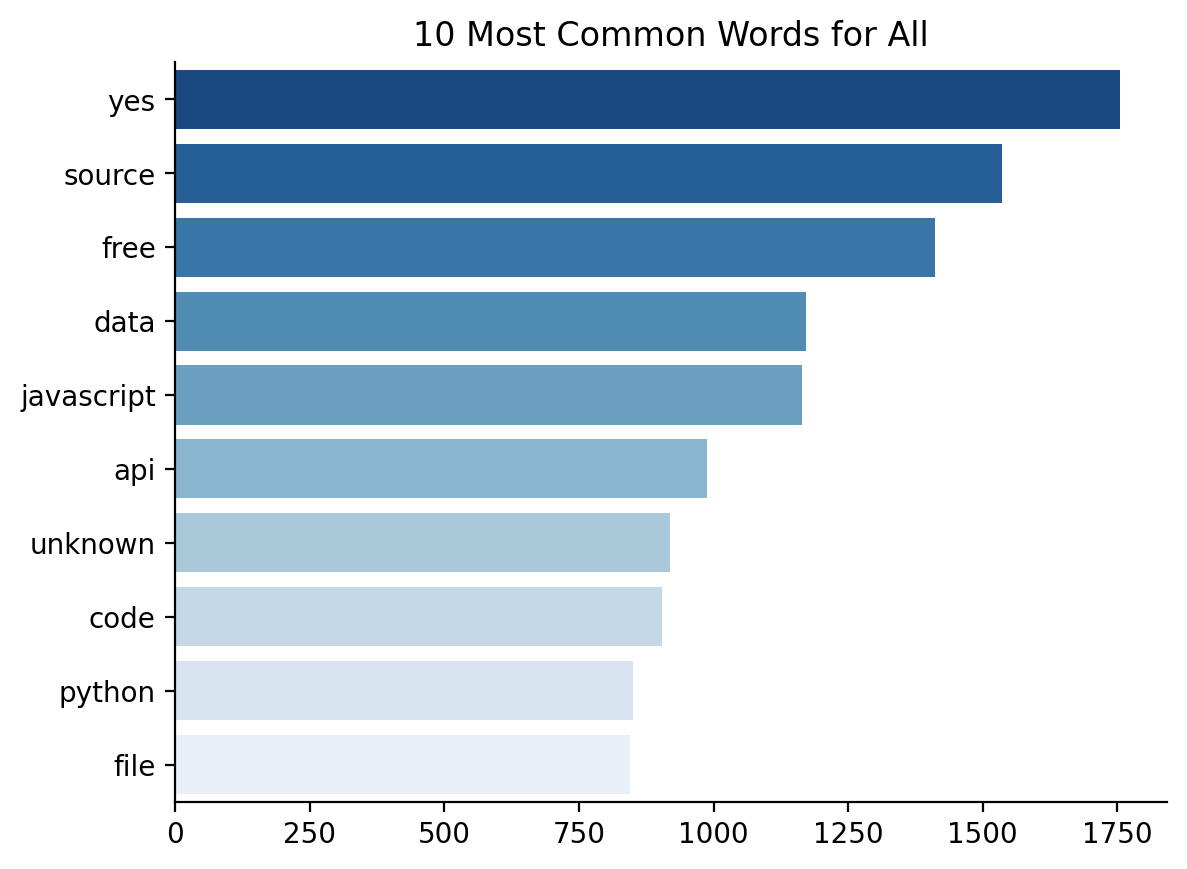

In [5]:
e.find_most_common_words(train, num_words=10);

**Does the length of the README vary by programming language?**

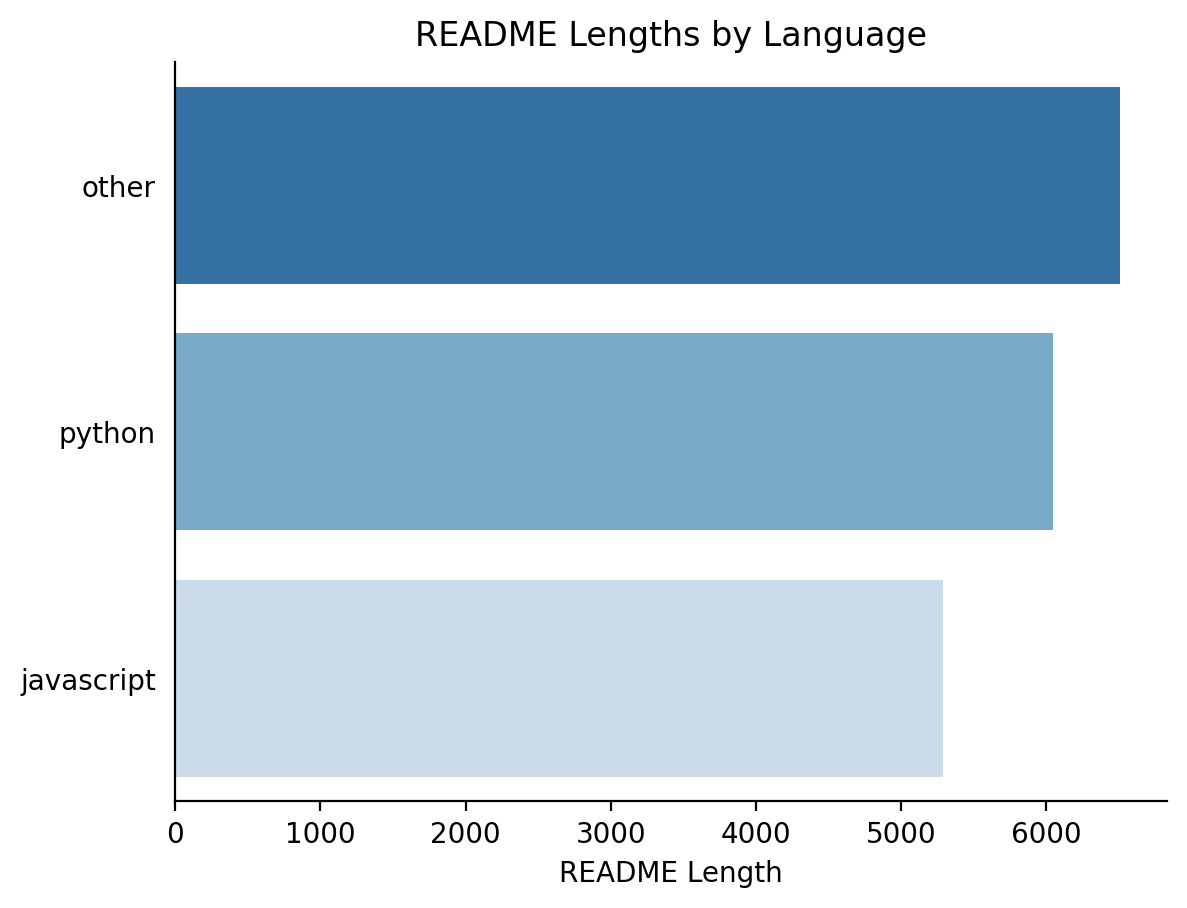

In [6]:
e.plot_readme_lengths(train)

**Do different programming languages use a different number of unique words?**

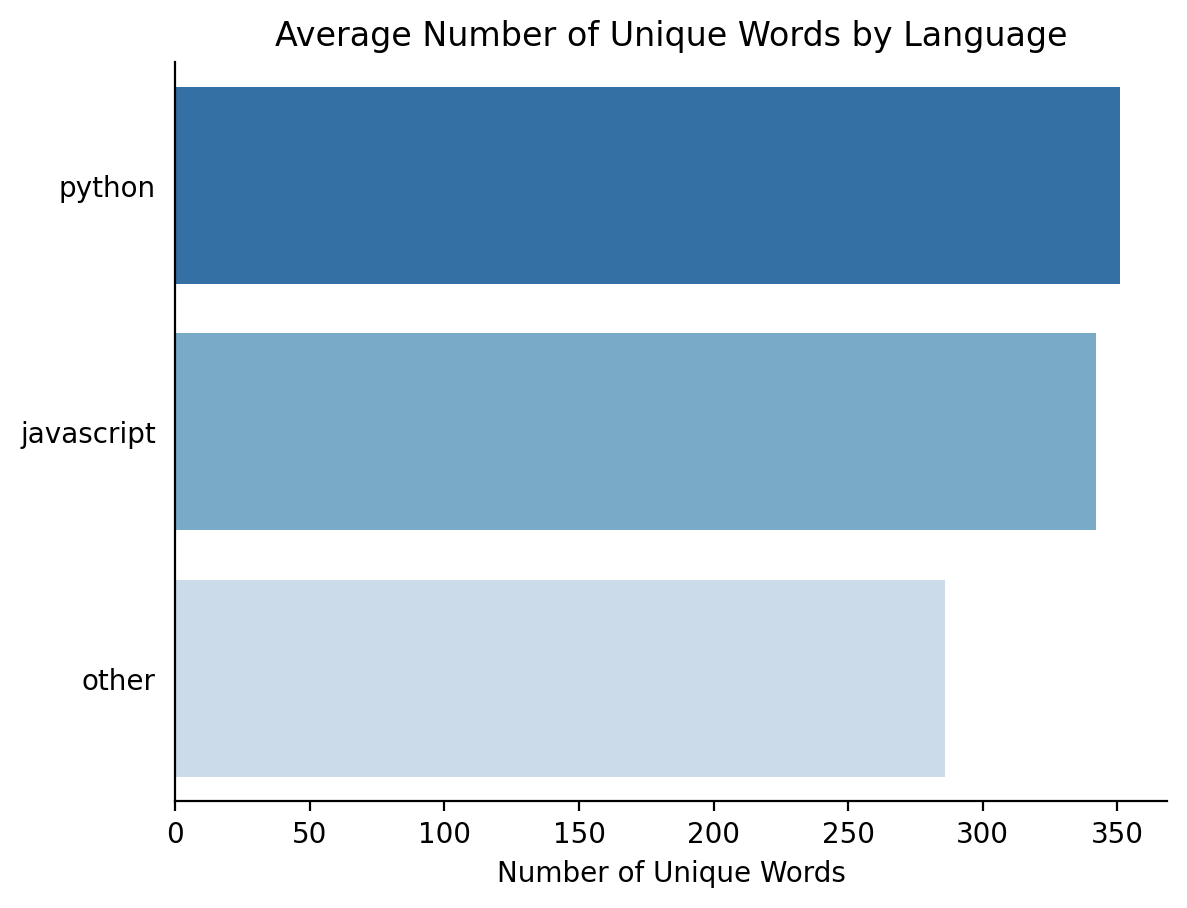

In [7]:
e.plot_unique_word_averages(df)

**Are there any words that uniquely identify a programming language?**

Other:
img        0.029445
spring     0.028087
code       0.024760
github     0.024645
project    0.023891
Name: 0, dtype: float64 



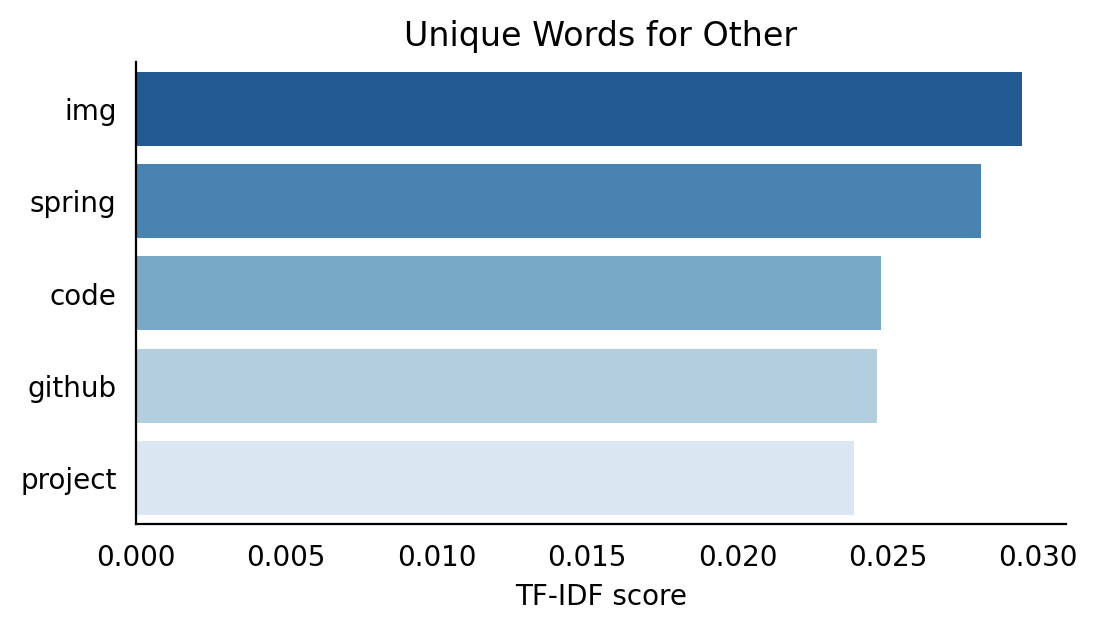

--------------------------------------------------
Python:
python         0.134102
img            0.041047
br             0.029588
aligncenter    0.026745
model          0.026549
Name: 1, dtype: float64 



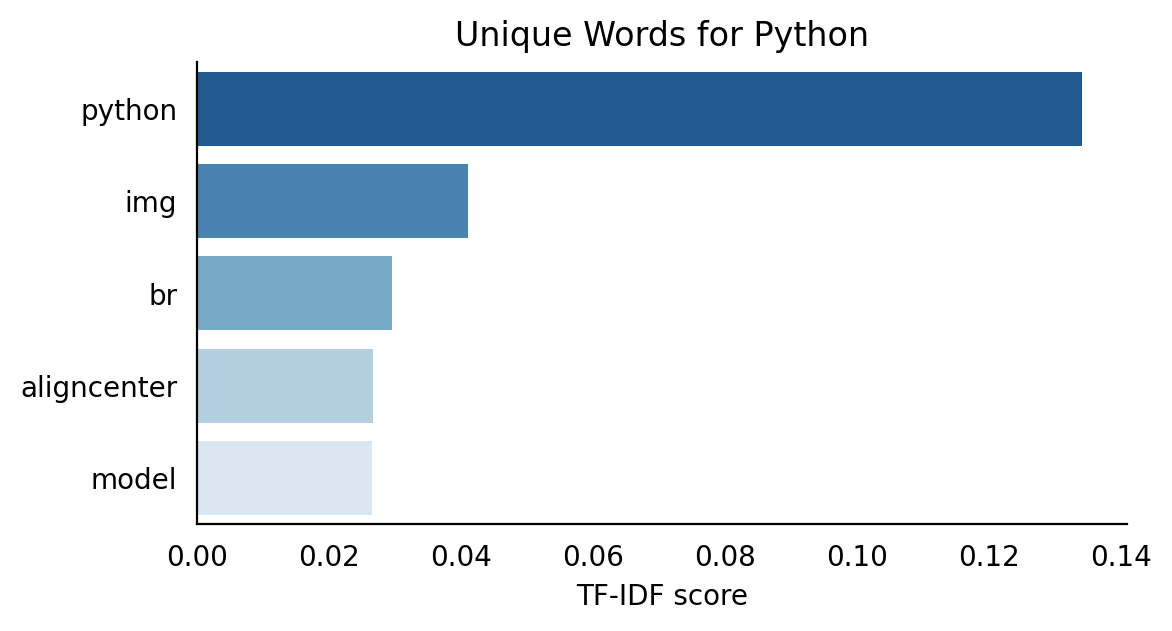

--------------------------------------------------
Javascript:
javascript    0.067245
react         0.034618
file          0.033534
npm           0.032669
code          0.028242
Name: 2, dtype: float64 



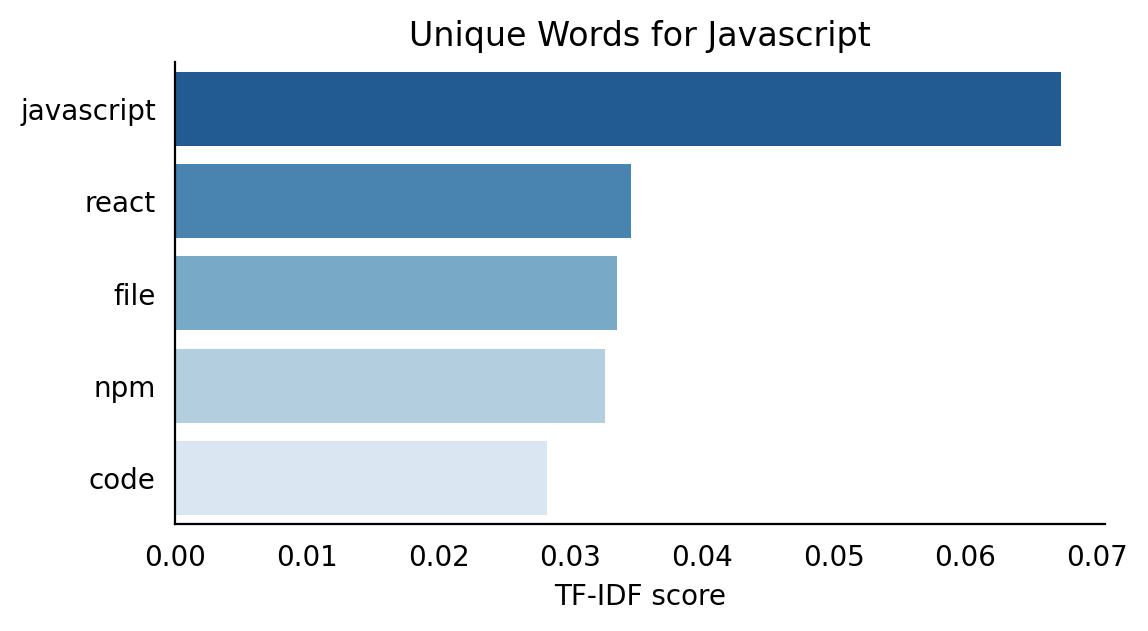

In [8]:
e.identify_unique_words(df, plot=True)

## Modeling

## Conclusion

### Summary

Analysis:


Modeling:


### Recommendations 

### Next Steps